In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
data=pd.read_csv(r"C:\Users\lenovo-pc\Desktop\Board Infinity (Data Science)\Python\Assignment\Python Assignment 2_BI\playstore-analysis.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [53]:
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


# Task:1 Data clean up – Missing value treatment
### a. Drop records where rating is missing since rating is our target/study variable

In [54]:
print(f"Missing Values :\n{data.isnull().sum()}")

Missing Values :
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [55]:
data1=data.dropna(subset=['Rating'])
print(f"Missing Values :\n{data1.isnull().sum()}")

Missing Values :
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64


### b. Check the null values for the Android Ver column.<br>
    i. Are all 3 records having the same problem?
    ii.Drop the 3rd record i.e. record for “Life Made WIFI …”
    iii. Replace remaining missing values with the mode

In [56]:
print(f"Missing Values :\n{data1['Android Ver'].isnull().sum()}")

Missing Values :
3


In [57]:
data1[data1.App.str.contains("Life Made")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [58]:
data2 = data1.drop(10472)
verify = data2[data2["App"]=='Life Made WI-Fi Touchscreen Photo Frame']
print (verify)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [59]:
import statistics
Android_list = data2['Android Ver'].to_list()
Al=[4.2,1.5,4.0,4.0]
data2_new = data2.fillna(statistics.mode(Al))

### c. Current ver – replace with most common value

In [60]:
print(f"Missing Values :{data2_new['Current Ver'].isnull().sum()}")

Missing Values :0


# 2. Data clean up – correcting the data types
### a. Which all variables need to be brought to numeric types?

In [61]:
data2_new['Reviews'] = data2_new['Reviews'].astype(int)
data2_new['Size'] = data2_new['Size'].astype(int)

### b. Price variable – remove $ sign and convert to float

In [62]:
data2_new['Price'] = data2_new['Price'].str.replace('$', '')
data2_new.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [63]:
data2_new['Price'] = data2_new['Price'].astype(float)
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   int32  
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), int32(2), object(9)
memory usage: 951.2+ KB


### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [65]:
data2_new['Installs'] = data2_new['Installs'].str.replace('+','')
data2_new['Installs'] = data2_new['Installs'].str.replace(',', '')
data2_new['Installs'] = data2_new['Installs'].astype(int)
data2_new.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [66]:
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   int32  
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), int32(3), object(8)
memory usage: 914.6+ KB


# 3. Sanity checks – check for the following and handle accordingly
### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.<br>
    i. Are there any such records? Drop if so.

In [67]:
pd.unique(data2_new[['Rating']].values.ravel())

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

### b. Reviews should not be more than installs as only those who installed can review the app.<br>
    i. Are there any such records? Drop if so.

In [68]:
df = pd.DataFrame()
df = data2_new[data2_new.Reviews <= data2_new.Installs]
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 4. Identify and handle outliers –
### a. Price column <br>
    i. Make suitable plot to identify outliers in price

C:\Users\lenovo-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


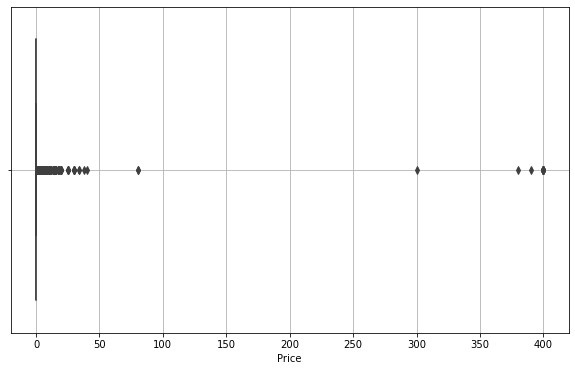

In [69]:
plt.subplots(figsize=(10,6))
sns.boxplot(df.Price)
plt.grid(linestyle='-')
plt.show()

ii. Do you expect apps on the play store to cost $200? Check out these cases

In [70]:
rslt_df = data2_new[data2_new['Price'] == 200]
print(rslt_df)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


iii. After dropping the useless records, make the suitable plot again to identify
outliers

C:\Users\lenovo-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


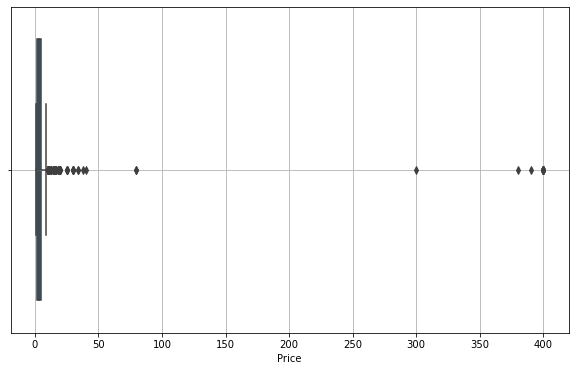

In [75]:
new_df = df[df['Price'] != 0]

plt.subplots(figsize=(10,6))
sns.boxplot(new_df.Price)
plt.grid()
plt.show()

iv. Limit data to records with price < $30

In [76]:
limit_data = df[df['Price'] < 30]
limit_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### b. Reviews column<br>
    i. Make suitable plot

Category
GAME                   1585419555
COMMUNICATION           815461799
SOCIAL                  621241071
FAMILY                  410223081
TOOLS                   273184168
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70829568
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893622
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17550406
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12871520
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3381945
ART_AND_DESIGN            1714372
MEDICAL                   1585618
AUTO_AND_VEHICLES         1163630
LIBRA

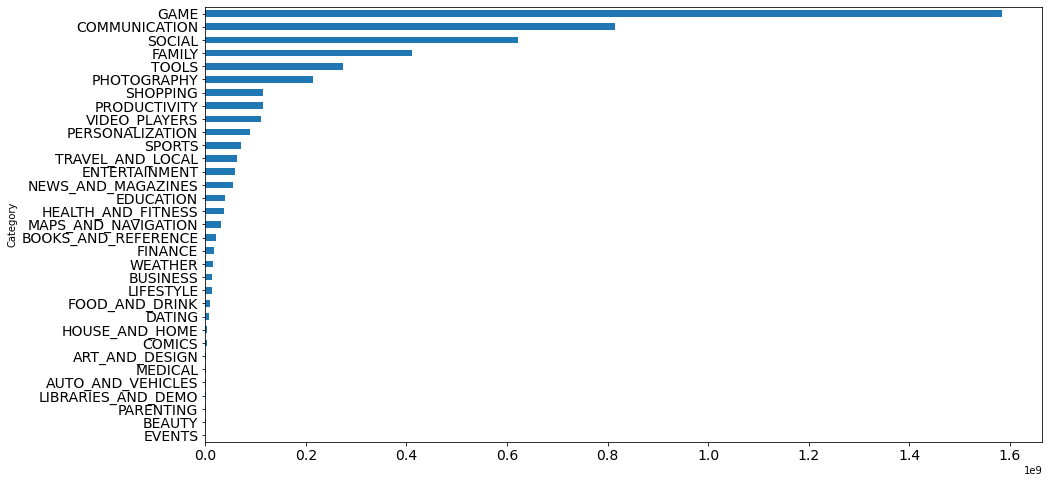

In [88]:
total=df.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind='barh', fontsize=14)
print(total.sort_values(ascending=False))
plt.show()

ii. Limit data to apps with < 1 Million reviews

In [89]:
limit_data_by_review = df[df['Reviews'] < 1000000]
limit_data_by_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [91]:
limit_data_by_review.shape

(8655, 13)

### c. Installs<br>
    i. What is the 95th percentile of the installs?

In [93]:
value = df.Installs.quantile(0.95)
print(value)

100000000.0


    ii. Drop records having a value more than the 95th percentile

In [98]:
x = df.Installs.quantile() > value
print (x)

False


# Data analysis to answer business questions
## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
### a. How do you explain this?

C:\Users\lenovo-pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


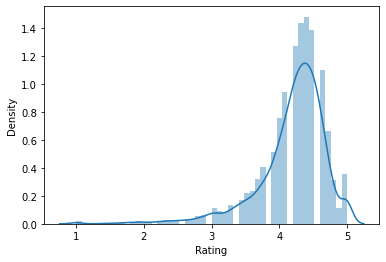

In [100]:
sns.distplot(df['Rating'])
plt.show()

Rating is higher in between 4 and 5.

### b. What is the implication of this on your analysis?

In [101]:
df['Rating'].mode()

0    4.4
dtype: float64

Here, mode> median > mean, the distribution of Rating is Negatively Skewed. That's why distribution of Rating is more Skewed towards lower values.

## 6. What are the top Content Rating values?
### a. Are there any values with very few records?

In [102]:
df['Content Rating'].value_counts()

Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

### b. If yes, drop those as they won’t help in the analysis

In [105]:
Adult_rating = df[df['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =df[df['Content Rating'] == 'Unrated'].index.to_list()
df.drop(Adult_rating, inplace = True)
df.drop(unrated, inplace = True)
df['Content Rating'].value_counts()

C:\Users\lenovo-pc\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Everyone        7414
Teen            1083
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

## 7. Effect of size on rating
### a. Make a joinplot to understand the effect of size on rating

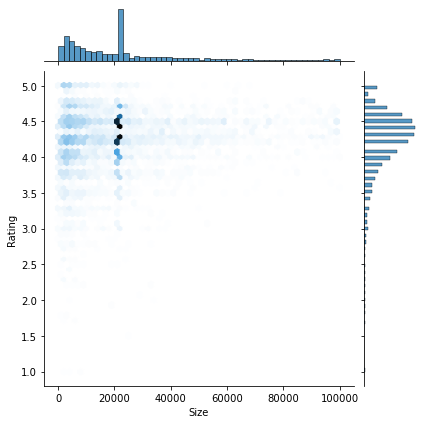

In [115]:
sns.jointplot(x=df['Size'],y=df['Rating'],data=df,kind='hex')
plt.show()

### b. Do you see any patterns? <br>
    Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating.

### c. How do you explain the pattern? <br>
    As we can see, maximum data points are gathered between Size 0-40000 and Rating 4.0-4.5. Which means applications get higher ratings if there size lies between 0-40000.

## 8. Effect of price on rating
### a. Make a jointplot (with regression line)

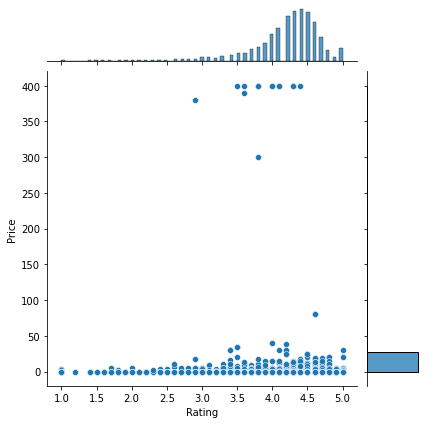

In [116]:
sns.jointplot(x ="Rating" , y = "Price" ,data = df)
plt.show()

### b. What pattern do you see? <br>
    Generally on increasing the Price, Rating remains almost constant greater than 4.

### c. How do you explain the pattern? <br>
    Increasing of the Price, Rating almost remains constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

### d. Replot the data, this time with only records with price > 0

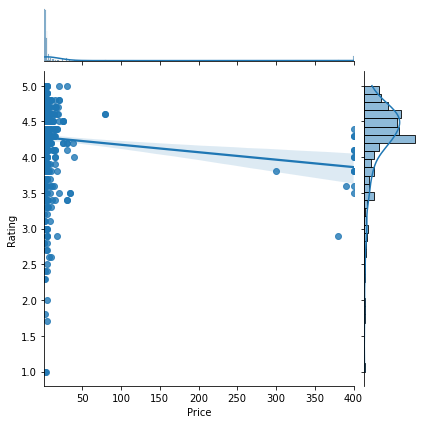

In [120]:
Price_greaterthan_zero = df[df['Price'] > 0]
sns.jointplot(x ="Price" , y = "Rating" ,data = Price_greaterthan_zero, kind = "reg" )
plt.show()

### e. Does the pattern change?<br>
    Yes, On limiting the record with Price > 0, the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating.

### f. What is your overall inference on the effect of price on the rating. <br>
    Generally increasing the Price, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4.

## 9. Look at all the numeric interactions together –
### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

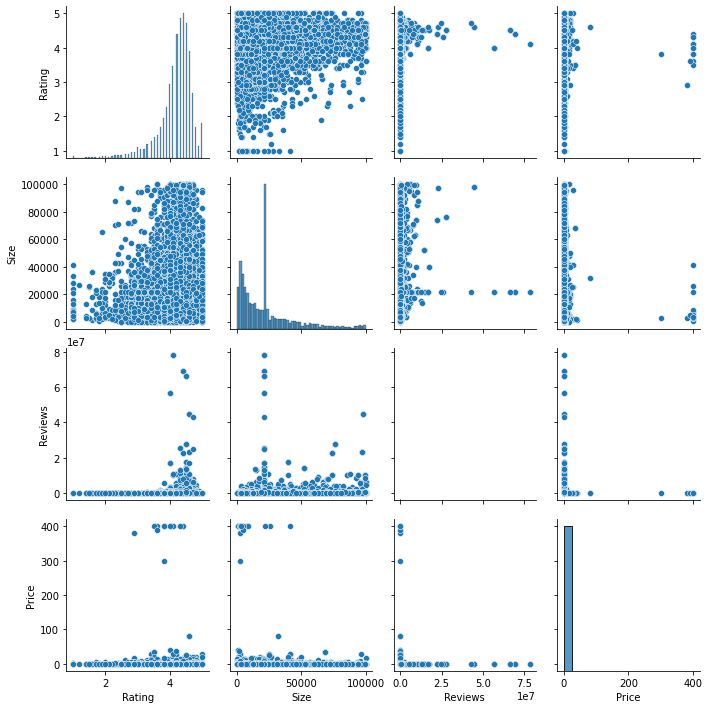

In [121]:
sns.pairplot(df,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

## 10. Rating vs. content rating. <br>
### a. Make a bar plot displaying the rating for each content rating.

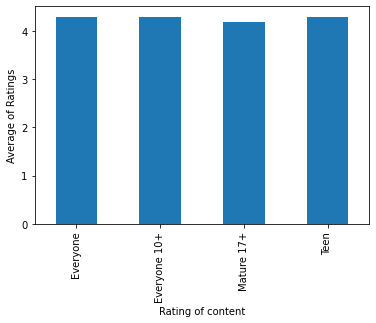

In [122]:
a = df['Rating'].groupby(df['Content Rating']).median().plot(kind = 'bar')
a.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

### b. Which metric would you use? Mean? Median? Some other quantile? <br>
    We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

### c. Choose the right metric and plot.

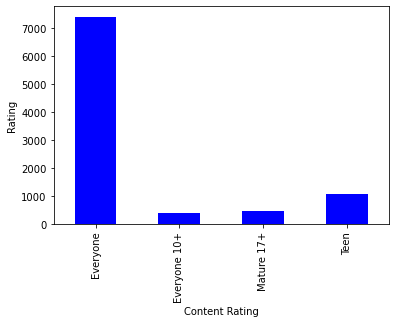

In [123]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="b")
plt.ylabel('Rating')
plt.show()

## 11. Content rating vs. size vs. rating – 3 variables at a time. 
### a. Create 5 buckets (20% records in each) based on Size.

In [124]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

<ipython-input-124-43d09af17f92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])


Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.148721,4.247561,4.015183,4.187047
20k-40k,4.228845,4.197802,4.195109,4.237590
40k-60k,4.192505,4.265957,4.202222,4.270896
60k-80k,4.271774,4.374000,4.190909,4.291045
80k-100k,4.280000,4.405556,4.252632,4.314815


### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [127]:
temp3=pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.8,4.02,3.5,3.9
20k-40k,4.0,4.00,4.0,4.0
40k-60k,3.9,4.10,4.1,4.0
60k-80k,4.0,4.20,4.0,4.0
80k-100k,4.1,4.30,4.0,4.1


### c. Make a heatmap of this <br>
    i. Annotated

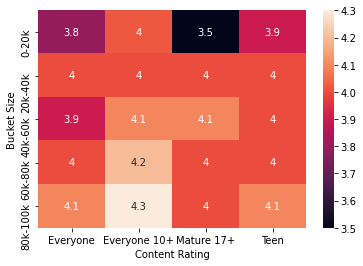

In [134]:
sns.heatmap(temp3, annot = True)
plt.show()

ii. Greens color map

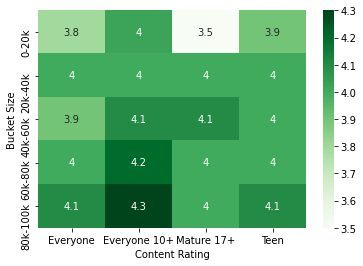

In [130]:
sns.heatmap(temp3, annot=True, cmap='Greens')
plt.show()

### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some? <br>

    Yes, most of heavier apps seems to be more preferred in all the Content Ratings. But, not to a big variations in it. Except, Mature 17+ where low size apps arent preferred to a greater variation.